## D212 - Data Mining II - PA2

### Background Info:

**You are an analyst for a hospital that wants to better understand the characteristics of its patients. You have been asked to use PCA to analyze patient data to identify the principal variables of your patients, ultimately allowing better business and strategic decision-making for the hospital.**

**_Question: "From information about previous patients who were readmitted, can we predict which patients are likely to be readmitted in the future?"_**

### Import Libraries

In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from scipy import stats
%matplotlib inline

### Load Data From medical_clean.csv

In [4]:
# load data file
df = pd.read_csv('medical_clean.csv')
# quick test the data is present and see the shape
df.head()

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,...,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,35621,34.34960,-86.72508,...,3726.702860,17939.403420,3,3,2,2,4,3,3,4
1,2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,32446,30.84513,-85.22907,...,4193.190458,17612.998120,3,4,3,4,4,4,3,3
2,3,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,57110,43.54321,-96.63772,...,2434.234222,17505.192460,2,4,4,4,3,4,3,3
3,4,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,cd17d7b6d152cb6f23957346d11c3f07,New Richland,MN,Waseca,56072,43.89744,-93.51479,...,2127.830423,12993.437350,3,5,5,3,4,5,5,5
4,5,C544523,5885f56b-d6da-43a3-8760-83583af94266,d2f0425877b10ed6bb381f3e2579424a,West Point,VA,King William,23181,37.59894,-76.88958,...,2113.073274,3716.525786,2,1,3,3,5,3,4,3


---
### Exploratory Data Analysis
---

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CaseOrder           10000 non-null  int64  
 1   Customer_id         10000 non-null  object 
 2   Interaction         10000 non-null  object 
 3   UID                 10000 non-null  object 
 4   City                10000 non-null  object 
 5   State               10000 non-null  object 
 6   County              10000 non-null  object 
 7   Zip                 10000 non-null  int64  
 8   Lat                 10000 non-null  float64
 9   Lng                 10000 non-null  float64
 10  Population          10000 non-null  int64  
 11  Area                10000 non-null  object 
 12  TimeZone            10000 non-null  object 
 13  Job                 10000 non-null  object 
 14  Children            10000 non-null  int64  
 15  Age                 10000 non-null  int64  
 16  Incom

### Check for Missing Values

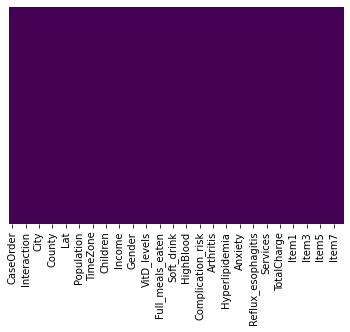

In [6]:
# Mapping to view missing data...none present.
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis');

In [7]:
df.describe()

,CaseOrder,Zip,Lat,Lng,Population,Children,Age,Income,VitD_levels,Doc_visits,...,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,50159.323900,38.751099,-91.243080,9965.253800,2.097200,53.511700,40490.495160,17.964262,5.012200,...,5312.172769,12934.528587,3.518800,3.506700,3.511100,3.515100,3.496900,3.522500,3.494000,3.509700
std,2886.89568,27469.588208,5.403085,15.205998,14824.758614,2.163659,20.638538,28521.153293,2.017231,1.045734,...,2180.393838,6542.601544,1.031966,1.034825,1.032755,1.036282,1.030192,1.032376,1.021405,1.042312
min,1.00000,610.000000,17.967190,-174.209700,0.000000,0.000000,18.000000,154.080000,9.806483,1.000000,...,1938.312067,3125.703000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2500.75000,27592.000000,35.255120,-97.352982,694.750000,0.000000,36.000000,19598.775000,16.626439,4.000000,...,3179.374015,7986.487755,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,5000.50000,50207.000000,39.419355,-88.397230,2769.000000,1.000000,53.000000,33768.420000,17.951122,5.000000,...,5213.952000,11573.977735,4.000000,3.000000,4.000000,4.000000,3.000000,4.000000,3.000000,3.000000
75%,7500.25000,72411.750000,42.044175,-80.438050,13945.000000,3.000000,71.000000,54296.402500,19.347963,6.000000,...,7459.699750,15626.490000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,10000.00000,99929.000000,70.560990,-65.290170,122814.000000,10.000000,89.000000,207249.100000,26.394449,9.000000,...,9180.728000,30566.070000,8.000000,7.000000,8.000000,7.000000,7.000000,7.000000,7.000000,7.000000


### Describe and Explore Numeric Fields:

In [8]:
df.describe(include = [np.number])

,CaseOrder,Zip,Lat,Lng,Population,Children,Age,Income,VitD_levels,Doc_visits,...,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,50159.323900,38.751099,-91.243080,9965.253800,2.097200,53.511700,40490.495160,17.964262,5.012200,...,5312.172769,12934.528587,3.518800,3.506700,3.511100,3.515100,3.496900,3.522500,3.494000,3.509700
std,2886.89568,27469.588208,5.403085,15.205998,14824.758614,2.163659,20.638538,28521.153293,2.017231,1.045734,...,2180.393838,6542.601544,1.031966,1.034825,1.032755,1.036282,1.030192,1.032376,1.021405,1.042312
min,1.00000,610.000000,17.967190,-174.209700,0.000000,0.000000,18.000000,154.080000,9.806483,1.000000,...,1938.312067,3125.703000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2500.75000,27592.000000,35.255120,-97.352982,694.750000,0.000000,36.000000,19598.775000,16.626439,4.000000,...,3179.374015,7986.487755,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,5000.50000,50207.000000,39.419355,-88.397230,2769.000000,1.000000,53.000000,33768.420000,17.951122,5.000000,...,5213.952000,11573.977735,4.000000,3.000000,4.000000,4.000000,3.000000,4.000000,3.000000,3.000000
75%,7500.25000,72411.750000,42.044175,-80.438050,13945.000000,3.000000,71.000000,54296.402500,19.347963,6.000000,...,7459.699750,15626.490000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,10000.00000,99929.000000,70.560990,-65.290170,122814.000000,10.000000,89.000000,207249.100000,26.394449,9.000000,...,9180.728000,30566.070000,8.000000,7.000000,8.000000,7.000000,7.000000,7.000000,7.000000,7.000000


#### Create DataFrame w/Number DataTypes Only

In [9]:
df_num = df.select_dtypes(include='number')
df_num.head()

,CaseOrder,Zip,Lat,Lng,Population,Children,Age,Income,VitD_levels,Doc_visits,...,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,35621,34.34960,-86.72508,2951,1,53,86575.93,19.141466,6,...,3726.702860,17939.403420,3,3,2,2,4,3,3,4
1,2,32446,30.84513,-85.22907,11303,3,51,46805.99,18.940352,4,...,4193.190458,17612.998120,3,4,3,4,4,4,3,3
2,3,57110,43.54321,-96.63772,17125,3,53,14370.14,18.057507,4,...,2434.234222,17505.192460,2,4,4,4,3,4,3,3
3,4,56072,43.89744,-93.51479,2162,0,78,39741.49,16.576858,4,...,2127.830423,12993.437350,3,5,5,3,4,5,5,5
4,5,23181,37.59894,-76.88958,5287,1,22,1209.56,17.439069,5,...,2113.073274,3716.525786,2,1,3,3,5,3,4,3


### Describe and Explore Categorical Fields:

In [10]:
df.describe(exclude=[np.number])

,Customer_id,Interaction,UID,City,State,County,Area,TimeZone,Job,Marital,...,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services
count,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,...,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000
unique,10000,10000,10000,6072,52,1607,3,26,639,5,...,2,2,2,2,2,2,2,2,2,4
top,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Houston,TX,Jefferson,Rural,America/New_York,Outdoor activities/education manager,Widowed,...,Yes,No,No,No,No,No,No,No,No,Blood Work
freq,1,1,1,36,553,118,3369,3889,29,2045,...,7094,6426,7262,6628,5886,6785,6059,5865,7107,5265


#### Create DataFrame w/Categorical DataTypes Only

In [11]:
df_cat = df.select_dtypes(exclude='number')
df_cat.head()

,Customer_id,Interaction,UID,City,State,County,Area,TimeZone,Job,Marital,...,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services
0,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,Suburban,America/Chicago,"Psychologist, sport and exercise",Divorced,...,No,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Blood Work
1,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,Urban,America/Chicago,Community development worker,Married,...,Yes,No,No,No,No,No,No,Yes,No,Intravenous
2,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,Suburban,America/Chicago,Chief Executive Officer,Widowed,...,Yes,No,Yes,No,No,No,No,No,No,Blood Work
3,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,cd17d7b6d152cb6f23957346d11c3f07,New Richland,MN,Waseca,Suburban,America/Chicago,Early years teacher,Married,...,No,Yes,No,No,No,No,No,Yes,Yes,Blood Work
4,C544523,5885f56b-d6da-43a3-8760-83583af94266,d2f0425877b10ed6bb381f3e2579424a,West Point,VA,King William,Rural,America/New_York,Health promotion specialist,Widowed,...,No,No,No,Yes,No,No,Yes,No,No,CT Scan


#### Describe Readmissions

In [12]:
df[['ReAdmis']].describe()

,ReAdmis
count,10000
unique,2
top,No
freq,6331


#### Describe Columns

In [13]:
df.columns

Index(['CaseOrder', 'Customer_id', 'Interaction', 'UID', 'City', 'State',
       'County', 'Zip', 'Lat', 'Lng', 'Population', 'Area', 'TimeZone', 'Job',
       'Children', 'Age', 'Income', 'Marital', 'Gender', 'ReAdmis',
       'VitD_levels', 'Doc_visits', 'Full_meals_eaten', 'vitD_supp',
       'Soft_drink', 'Initial_admin', 'HighBlood', 'Stroke',
       'Complication_risk', 'Overweight', 'Arthritis', 'Diabetes',
       'Hyperlipidemia', 'BackPain', 'Anxiety', 'Allergic_rhinitis',
       'Reflux_esophagitis', 'Asthma', 'Services', 'Initial_days',
       'TotalCharge', 'Additional_charges', 'Item1', 'Item2', 'Item3', 'Item4',
       'Item5', 'Item6', 'Item7', 'Item8'],
      dtype='object')

### Prep Dummies Data

In [14]:
df_temp = df[['Age', 'Gender', 'ReAdmis', 'VitD_levels', 'Doc_visits', 'vitD_supp', 'Initial_admin', \
              'HighBlood', 'Stroke', 'Complication_risk', 'Overweight', 'Arthritis', 'Diabetes', 'Hyperlipidemia', \
              'BackPain', 'Anxiety', 'Allergic_rhinitis', 'Reflux_esophagitis', 'Asthma', 'Services', 'Initial_days', \
              'TotalCharge', 'Additional_charges']]

In [15]:
df_dummies = pd.get_dummies(df_temp)
df_dummies.head()

,Age,VitD_levels,Doc_visits,vitD_supp,Initial_days,TotalCharge,Additional_charges,Gender_Female,Gender_Male,Gender_Nonbinary,...,Allergic_rhinitis_No,Allergic_rhinitis_Yes,Reflux_esophagitis_No,Reflux_esophagitis_Yes,Asthma_No,Asthma_Yes,Services_Blood Work,Services_CT Scan,Services_Intravenous,Services_MRI
0,53,19.141466,6,0,10.585770,3726.702860,17939.403420,0,1,0,...,0,1,1,0,0,1,1,0,0,0
1,51,18.940352,4,1,15.129562,4193.190458,17612.998120,1,0,0,...,1,0,0,1,1,0,0,0,1,0
2,53,18.057507,4,0,4.772177,2434.234222,17505.192460,1,0,0,...,1,0,1,0,1,0,1,0,0,0
3,78,16.576858,4,0,1.714879,2127.830423,12993.437350,0,1,0,...,1,0,0,1,0,1,1,0,0,0
4,22,17.439069,5,2,1.254807,2113.073274,3716.525786,1,0,0,...,0,1,1,0,1,0,0,1,0,0


In [16]:
df_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 44 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Age                                  10000 non-null  int64  
 1   VitD_levels                          10000 non-null  float64
 2   Doc_visits                           10000 non-null  int64  
 3   vitD_supp                            10000 non-null  int64  
 4   Initial_days                         10000 non-null  float64
 5   TotalCharge                          10000 non-null  float64
 6   Additional_charges                   10000 non-null  float64
 7   Gender_Female                        10000 non-null  uint8  
 8   Gender_Male                          10000 non-null  uint8  
 9   Gender_Nonbinary                     10000 non-null  uint8  
 10  ReAdmis_No                           10000 non-null  uint8  
 11  ReAdmis_Yes                  

In [17]:
df_dummies.columns

Index(['Age', 'VitD_levels', 'Doc_visits', 'vitD_supp', 'Initial_days',
       'TotalCharge', 'Additional_charges', 'Gender_Female', 'Gender_Male',
       'Gender_Nonbinary', 'ReAdmis_No', 'ReAdmis_Yes',
       'Initial_admin_Elective Admission', 'Initial_admin_Emergency Admission',
       'Initial_admin_Observation Admission', 'HighBlood_No', 'HighBlood_Yes',
       'Stroke_No', 'Stroke_Yes', 'Complication_risk_High',
       'Complication_risk_Low', 'Complication_risk_Medium', 'Overweight_No',
       'Overweight_Yes', 'Arthritis_No', 'Arthritis_Yes', 'Diabetes_No',
       'Diabetes_Yes', 'Hyperlipidemia_No', 'Hyperlipidemia_Yes',
       'BackPain_No', 'BackPain_Yes', 'Anxiety_No', 'Anxiety_Yes',
       'Allergic_rhinitis_No', 'Allergic_rhinitis_Yes',
       'Reflux_esophagitis_No', 'Reflux_esophagitis_Yes', 'Asthma_No',
       'Asthma_Yes', 'Services_Blood Work', 'Services_CT Scan',
       'Services_Intravenous', 'Services_MRI'],
      dtype='object')

### Prep Dummies Data

In [18]:
df_temp = df[['Age', 'Gender', 'ReAdmis', 'VitD_levels', 'Doc_visits', 'vitD_supp', 'Initial_admin', \
              'HighBlood', 'Stroke', 'Complication_risk', 'Overweight', 'Arthritis', 'Diabetes', 'Hyperlipidemia', \
              'BackPain', 'Anxiety', 'Allergic_rhinitis', 'Reflux_esophagitis', 'Asthma', 'Services', 'Initial_days', \
              'TotalCharge', 'Additional_charges']]

In [19]:
df_dummies = pd.get_dummies(df_temp)
df_dummies.head()

,Age,VitD_levels,Doc_visits,vitD_supp,Initial_days,TotalCharge,Additional_charges,Gender_Female,Gender_Male,Gender_Nonbinary,...,Allergic_rhinitis_No,Allergic_rhinitis_Yes,Reflux_esophagitis_No,Reflux_esophagitis_Yes,Asthma_No,Asthma_Yes,Services_Blood Work,Services_CT Scan,Services_Intravenous,Services_MRI
0,53,19.141466,6,0,10.585770,3726.702860,17939.403420,0,1,0,...,0,1,1,0,0,1,1,0,0,0
1,51,18.940352,4,1,15.129562,4193.190458,17612.998120,1,0,0,...,1,0,0,1,1,0,0,0,1,0
2,53,18.057507,4,0,4.772177,2434.234222,17505.192460,1,0,0,...,1,0,1,0,1,0,1,0,0,0
3,78,16.576858,4,0,1.714879,2127.830423,12993.437350,0,1,0,...,1,0,0,1,0,1,1,0,0,0
4,22,17.439069,5,2,1.254807,2113.073274,3716.525786,1,0,0,...,0,1,1,0,1,0,0,1,0,0


In [108]:
df_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 44 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Age                                  10000 non-null  int64  
 1   VitD_levels                          10000 non-null  float64
 2   Doc_visits                           10000 non-null  int64  
 3   vitD_supp                            10000 non-null  int64  
 4   Initial_days                         10000 non-null  float64
 5   TotalCharge                          10000 non-null  float64
 6   Additional_charges                   10000 non-null  float64
 7   Gender_Female                        10000 non-null  uint8  
 8   Gender_Male                          10000 non-null  uint8  
 9   Gender_Nonbinary                     10000 non-null  uint8  
 10  ReAdmis_No                           10000 non-null  uint8  
 11  ReAdmis_Yes                  

### Keep Only Necessary Columns

In [21]:
# Start pruning non-relavent features
# Create target and predictor series
pca_df_target = df_dummies['ReAdmis_Yes']
pca_df = df.drop(['CaseOrder', 'Interaction','Customer_id', 'UID', 'Job', 'Zip', 'City', 'County','ReAdmis','Item1', 'Item2', 'Item3', 'Item4','Item5', 'Item6', 'Item7', 'Item8'], axis=1)
pca_df_target.info()
print('---'*5)
pca_df.columns

<class 'pandas.core.series.Series'>
RangeIndex: 10000 entries, 0 to 9999
Series name: ReAdmis_Yes
Non-Null Count  Dtype
--------------  -----
10000 non-null  uint8
dtypes: uint8(1)
memory usage: 9.9 KB
---------------


Index(['State', 'Lat', 'Lng', 'Population', 'Area', 'TimeZone', 'Children',
       'Age', 'Income', 'Marital', 'Gender', 'VitD_levels', 'Doc_visits',
       'Full_meals_eaten', 'vitD_supp', 'Soft_drink', 'Initial_admin',
       'HighBlood', 'Stroke', 'Complication_risk', 'Overweight', 'Arthritis',
       'Diabetes', 'Hyperlipidemia', 'BackPain', 'Anxiety',
       'Allergic_rhinitis', 'Reflux_esophagitis', 'Asthma', 'Services',
       'Initial_days', 'TotalCharge', 'Additional_charges'],
      dtype='object')

In [22]:
# testing how to identify categorical data
for t in pca_df.dtypes:
    if t == "float64":
        print("yes")

yes
yes
yes
yes
yes
yes
yes


In [23]:
pca_df.dtypes

State                  object
Lat                   float64
Lng                   float64
Population              int64
Area                   object
TimeZone               object
Children                int64
Age                     int64
Income                float64
Marital                object
Gender                 object
VitD_levels           float64
Doc_visits              int64
Full_meals_eaten        int64
vitD_supp               int64
Soft_drink             object
Initial_admin          object
HighBlood              object
Stroke                 object
Complication_risk      object
Overweight             object
Arthritis              object
Diabetes               object
Hyperlipidemia         object
BackPain               object
Anxiety                object
Allergic_rhinitis      object
Reflux_esophagitis     object
Asthma                 object
Services               object
Initial_days          float64
TotalCharge           float64
Additional_charges    float64
dtype: obj

### Create Dummies Function for specific datatypes, reduce multicoliniarity

In [24]:
def dummify(df, max_cols=10):
    # Get list of orig df cols
    df_cols = df.columns
    # Make copy of df
    df_dummy=df.copy()
    # ForEach Col, check if numeric.  If no, convert to binary
    for t in df_cols:
        if str(df_dummy[t].dtypes) not in ['float64', 'int64']:  # if numeric var dissapears, check dtypes and add new ones as needed.
            # take non numerics, set (unique) list, then sort
            val_list = sorted(list(set(df_dummy[t])))
            if len(val_list) > 1 and len(val_list) <= max_cols:
                for v in val_list[1:]: # make 'no' the dummy var
                    df_dummy[t+"__"+str(v)]=df_dummy[t].apply(lambda x: 1 if x == v else 0)
            df_dummy.drop([t],axis=1, inplace=True)
    return df_dummy

In [25]:
pca_df_binary = dummify(pca_df)
pca_df_binary.head()

,Lat,Lng,Population,Children,Age,Income,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,...,Diabetes__Yes,Hyperlipidemia__Yes,BackPain__Yes,Anxiety__Yes,Allergic_rhinitis__Yes,Reflux_esophagitis__Yes,Asthma__Yes,Services__CT Scan,Services__Intravenous,Services__MRI
0,34.34960,-86.72508,2951,1,53,86575.93,19.141466,6,0,0,...,1,0,1,1,1,0,1,0,0,0
1,30.84513,-85.22907,11303,3,51,46805.99,18.940352,4,2,1,...,0,0,0,0,0,1,0,0,1,0
2,43.54321,-96.63772,17125,3,53,14370.14,18.057507,4,1,0,...,1,0,0,0,0,0,0,0,0,0
3,43.89744,-93.51479,2162,0,78,39741.49,16.576858,4,1,0,...,0,0,0,0,0,1,1,0,0,0
4,37.59894,-76.88958,5287,1,22,1209.56,17.439069,5,0,2,...,0,1,0,0,1,0,0,1,0,0


In [26]:
pca_df_binary.columns

Index(['Lat', 'Lng', 'Population', 'Children', 'Age', 'Income', 'VitD_levels',
       'Doc_visits', 'Full_meals_eaten', 'vitD_supp', 'Initial_days',
       'TotalCharge', 'Additional_charges', 'Area__Suburban', 'Area__Urban',
       'Marital__Married', 'Marital__Never Married', 'Marital__Separated',
       'Marital__Widowed', 'Gender__Male', 'Gender__Nonbinary',
       'Soft_drink__Yes', 'Initial_admin__Emergency Admission',
       'Initial_admin__Observation Admission', 'HighBlood__Yes', 'Stroke__Yes',
       'Complication_risk__Low', 'Complication_risk__Medium',
       'Overweight__Yes', 'Arthritis__Yes', 'Diabetes__Yes',
       'Hyperlipidemia__Yes', 'BackPain__Yes', 'Anxiety__Yes',
       'Allergic_rhinitis__Yes', 'Reflux_esophagitis__Yes', 'Asthma__Yes',
       'Services__CT Scan', 'Services__Intravenous', 'Services__MRI'],
      dtype='object')

In [27]:
print('pca_df_target: ' + str(pca_df_target.shape))
print('------'*5)
print('pca_df_binary: ' + str(pca_df_binary.shape))

pca_df_target: (10000,)
------------------------------
pca_df_binary: (10000, 40)


In [28]:
print('pca_df_target: ' + str(pca_df_target.info()))
print('-------'*10)
print('pca_df_binary: ' + str(pca_df_binary.info()))

<class 'pandas.core.series.Series'>
RangeIndex: 10000 entries, 0 to 9999
Series name: ReAdmis_Yes
Non-Null Count  Dtype
--------------  -----
10000 non-null  uint8
dtypes: uint8(1)
memory usage: 9.9 KB
pca_df_target: None
----------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 40 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Lat                                   10000 non-null  float64
 1   Lng                                   10000 non-null  float64
 2   Population                            10000 non-null  int64  
 3   Children                              10000 non-null  int64  
 4   Age                                   10000 non-null  int64  
 5   Income                                10000 non-null  float64
 6   VitD_levels                           10000 non-null  floa

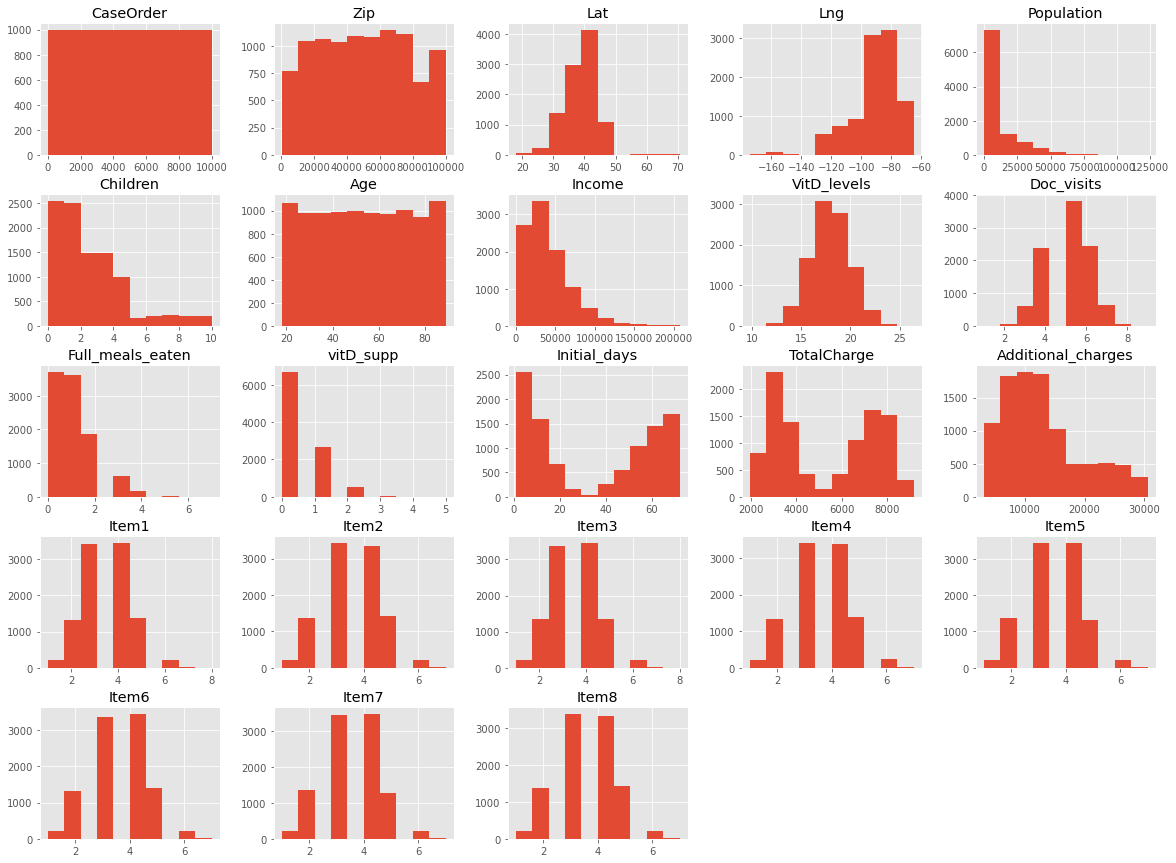

In [29]:
# https://www.datacamp.com/community/tutorials/preprocessing-in-data-science-part-1-centering-scaling-and-knn
plt.style.use('ggplot')
# df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv ' , sep = ';')
X = pca_df_binary.values # drop target variable
y1 = df_dummies['ReAdmis_Yes'].values
pd.DataFrame.hist(df, figsize = [20,15]);

In [31]:
# https://realpython.com/knn-python/
# Correlations with target?
correlation_matrix = df_dummies.corr()

print(correlation_matrix["ReAdmis_Yes"] > 0.5)

Age                                    False
VitD_levels                            False
Doc_visits                             False
vitD_supp                              False
Initial_days                            True
TotalCharge                             True
Additional_charges                     False
Gender_Female                          False
Gender_Male                            False
Gender_Nonbinary                       False
ReAdmis_No                             False
ReAdmis_Yes                             True
Initial_admin_Elective Admission       False
Initial_admin_Emergency Admission      False
Initial_admin_Observation Admission    False
HighBlood_No                           False
HighBlood_Yes                          False
Stroke_No                              False
Stroke_Yes                             False
Complication_risk_High                 False
Complication_risk_Low                  False
Complication_risk_Medium               False
Overweight

In [35]:
# Focused featurs from correlation matrix
pruned_df = df_dummies[['Initial_days', 'TotalCharge', 'ReAdmis_Yes']]

In [34]:
pruned_df.shape

(10000, 3)

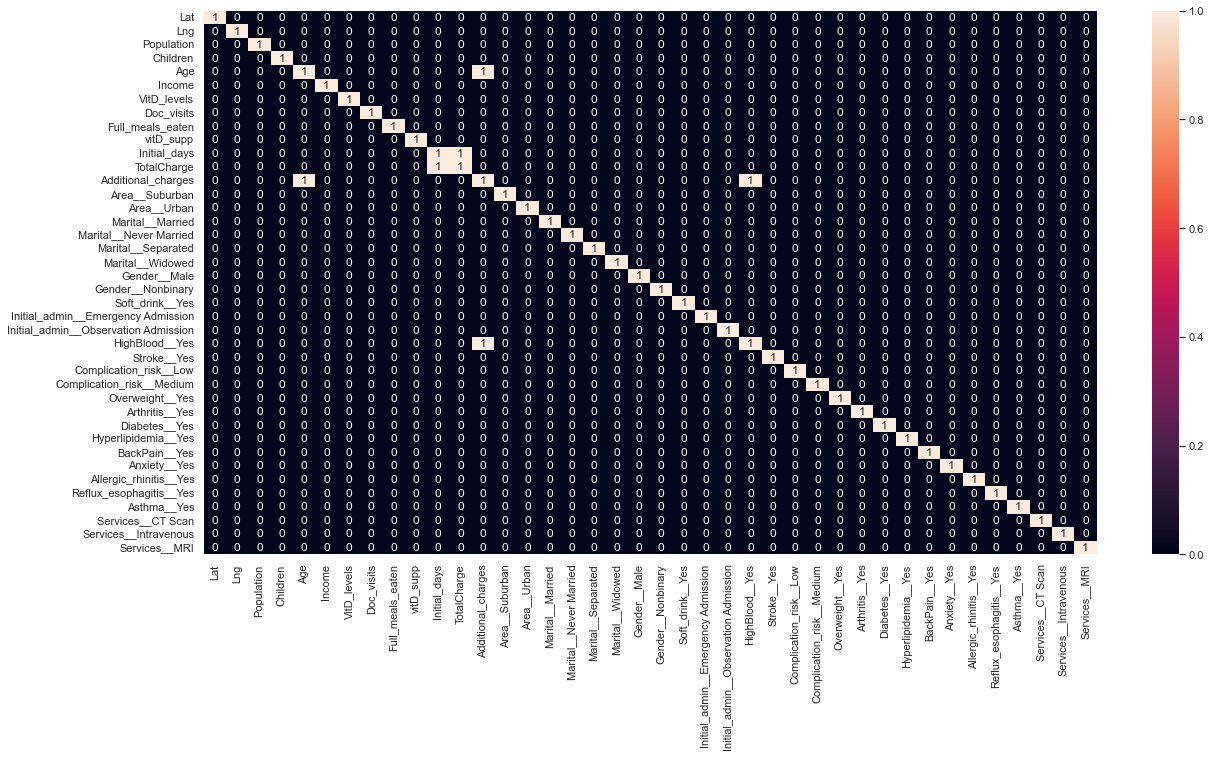

In [30]:
# Trying to make sense of numerical values, discover possible correlations
# Ref1: https://www.geeksforgeeks.org/how-to-create-a-seaborn-correlation-heatmap-in-python/
# Ref2: https://medium.com/@szabo.bibor/how-to-create-a-seaborn-correlation-heatmap-in-python-834c0686b88e
sns.set(rc = {'figure.figsize':(20,10)})
sns.heatmap(pca_df_binary.corr() > .5, annot=True);